<a href="https://colab.research.google.com/github/Chandu261/Data-Analytics-Projects/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/DataAnayticsProjectData2.csv')

In [3]:
df

,Transaction_ID,Customer_ID,Transaction_Amount,Location,Time_of_Day,Is_Fraudulent
0,1,101,1000,Mumbai,Morning,0
1,2,102,500,Delhi,Afternoon,1
2,3,103,2000,Chennai,Evening,0
3,4,104,300,Gujarat,Morning,1
4,5,105,800,Bengalore,Afternoon,0
5,6,106,1500,Mumbai,Evening,1
6,7,107,400,Delhi,Morning,0
7,8,108,2500,Chennai,Afternoon,1
8,9,109,700,Gujarat,Evening,0
9,10,110,1200,Bengalore,Morning,0


Transaction_ID        0
Customer_ID           0
Transaction_Amount    0
Location              0
Time_of_Day           0
Is_Fraudulent         0
dtype: int64


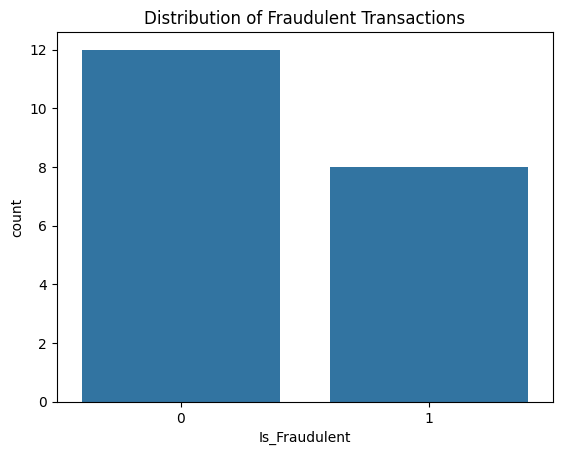

In [4]:
# Check for missing values
print(df.isnull().sum())

# No missing values in this sample data, so no need for imputation

# Visualize the data
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for fraudulent transactions
sns.countplot(x='Is_Fraudulent', data=df)
plt.title('Distribution of Fraudulent Transactions')
plt.show()



In [5]:
# Feature Engineering - Example: Creating a binary indicator for high transaction amounts
df['High_Transaction'] = df['Transaction_Amount'].apply(lambda x: 1 if x > 1000 else 0)

# Display the updated dataset
print(df)


    Transaction_ID  Customer_ID  Transaction_Amount   Location Time_of_Day  \
0                1          101                1000     Mumbai     Morning   
1                2          102                 500      Delhi   Afternoon   
2                3          103                2000    Chennai     Evening   
3                4          104                 300    Gujarat     Morning   
4                5          105                 800  Bengalore   Afternoon   
5                6          106                1500     Mumbai     Evening   
6                7          107                 400      Delhi     Morning   
7                8          108                2500    Chennai   Afternoon   
8                9          109                 700    Gujarat     Evening   
9               10          110                1200  Bengalore     Morning   
10              11          111                1800     Mumbai   Afternoon   
11              12          112                2200      Delhi  

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Features and target variable
X = df[['Transaction_Amount', 'High_Transaction']]
y = df['Is_Fraudulent']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, predictions)}')
print(classification_report(y_test, predictions))


Accuracy: 0.75
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



In [7]:
# Evaluate the model on the entire dataset
predictions_all = model.predict(X)

# Display the classification report for the entire dataset
print(classification_report(y, predictions_all))

# Deploy the model (in a real-world scenario, you'd use a more sophisticated deployment process)
# For simplicity, we'll consider the model as deployed

# Save the model for future use
import joblib
joblib.dump(model, 'fraud_detection_model.joblib')


              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.88      0.88      0.88         8

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



['fraud_detection_model.joblib']